## Reinforcement Learning Project
### Frozen Lake Problem

Folder Descriptions:
1. Run 3:
    - is_slippery = True
    - learning_rate_a = 0.9
    - discount_factor_g = 0.9
    - epsilon_decay_rate = 0.0001
    - Episodes = 15000

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time

%matplotlib inline

In [2]:
def run(episodes, is_training=True, render=False):

    env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=True, render_mode='human' if render else None)

    # Initialize q-table with 0s if training else load 
    if(is_training):
        q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 64 x 4 array
    else:
        f = open('Trained_policy.pkl', 'rb')
        q = pickle.load(f)
        f.close()

        
    learning_rate_a = 0.9 # alpha or learning rate
    discount_factor_g = 0.9 # gamma or discount rate. Near 0: more weight/reward placed on immediate state. Near 1: more on future state.
    epsilon = 1         # 1 = 100% random actions
    epsilon_decay_rate = 0.0001        # epsilon decay rate. 1/0.0001 = 10,000
    rng = np.random.default_rng()   # random number generator

    
    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        
        # Print epoch number after each 20% episodes are completed
        if episodes >= 5 and (i+1) % (int(episodes * 0.2)) == 0:
            print(f'episode {i+1}')
        
        state = env.reset()[0]  # states: 0 to 63, 0=top left corner,63=bottom right corner
        terminated = False      # True when fall in hole or reached goal
        truncated = False       # True when actions > 200

        while(not terminated and not truncated):
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample() # actions: 0=left,1=down,2=right,3=up
            else:
                action = np.argmax(q[state,:])

            new_state,reward,terminated,truncated,_ = env.step(action)

            if is_training:
                q[state,action] = q[state,action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action]
                )

            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate, 0)

        if(epsilon==0):
            learning_rate_a = 0.0001

        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    
    # Calculate running sum of rewards
    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    
    
    ## Print plot
    plt.xlabel('Episodes')
    plt.ylabel('Running Sum of Rewards (100 episodes)')
    
    if is_training:
        plt.title('Agent Training')
    else:
        plt.title('Agent Testing')
    plt.plot(sum_rewards)
    
    
    ## Save plot
    if is_training:
        plt.savefig(f'Train_graph_{episodes}.png')
    else:
        plt.savefig(f'Test_graph_{episodes}.png')
    
    
    # Save q-table
    if is_training:
        f = open(f"Trained_policy.pkl","wb")
        pickle.dump(q, f)
        f.close()
    
    
    return rewards_per_episode


## Training

episode 3000
episode 6000
episode 9000
episode 12000
episode 15000
Total Runtime: 9.237006187438965


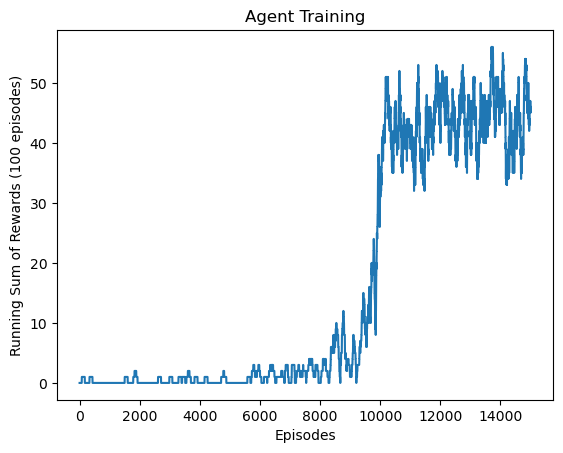

In [3]:
start_time = time.time()

rewards_per_episode = run(15000, is_training=True, render=False)

print(f'Total Runtime: {time.time() - start_time}')

## Testing

episode 200
episode 400
episode 600
episode 800
episode 1000


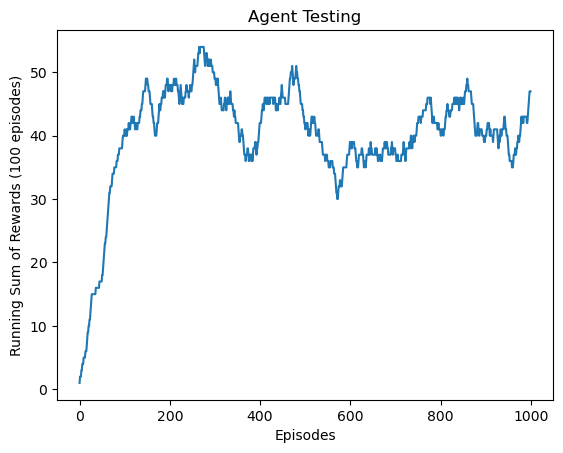

In [4]:
rewards_per_episode = run(1000, is_training=False, render=False)

## Train for 150000 episodes (Getting same results)

In [5]:
def run(episodes, is_training=True, render=False):

    env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=True, render_mode='human' if render else None)

    # Initialize q-table with 0s if training else load 
    if(is_training):
        q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 64 x 4 array
    else:
        f = open('Trained_policy.pkl', 'rb')
        q = pickle.load(f)
        f.close()

        
    learning_rate_a = 0.9 # alpha or learning rate
    discount_factor_g = 0.9 # gamma or discount rate. Near 0: more weight/reward placed on immediate state. Near 1: more on future state.
    epsilon = 1         # 1 = 100% random actions
    epsilon_decay_rate = 0.00001        # epsilon decay rate. 1/0.0001 = 10,000
    rng = np.random.default_rng()   # random number generator

    
    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        
        # Print epoch number after each 20% episodes are completed
        if episodes >= 5 and (i+1) % (int(episodes * 0.2)) == 0:
            print(f'episode {i+1}')
        
        state = env.reset()[0]  # states: 0 to 63, 0=top left corner,63=bottom right corner
        terminated = False      # True when fall in hole or reached goal
        truncated = False       # True when actions > 200

        while(not terminated and not truncated):
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample() # actions: 0=left,1=down,2=right,3=up
            else:
                action = np.argmax(q[state,:])

            new_state,reward,terminated,truncated,_ = env.step(action)

            if is_training:
                q[state,action] = q[state,action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action]
                )

            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate, 0)

        if(epsilon==0):
            learning_rate_a = 0.0001

        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    
    # Calculate running sum of rewards
    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    
    
    ## Print plot
    plt.xlabel('Episodes')
    plt.ylabel('Running Sum of Rewards (100 episodes)')
    
    if is_training:
        plt.title('Agent Training')
    else:
        plt.title('Agent Testing')
    plt.plot(sum_rewards)
    
    
    ## Save plot
#     if is_training:
#         plt.savefig(f'Train_graph_{episodes}.png')
#     else:
#         plt.savefig(f'Test_graph_{episodes}.png')
    
    
    # Save q-table
#     if is_training:
#         f = open(f"Trained_policy.pkl","wb")
#         pickle.dump(q, f)
#         f.close()
    
    
    return rewards_per_episode


episode 30000
episode 60000
episode 90000
episode 120000
episode 150000
Total Runtime: 93.89996600151062


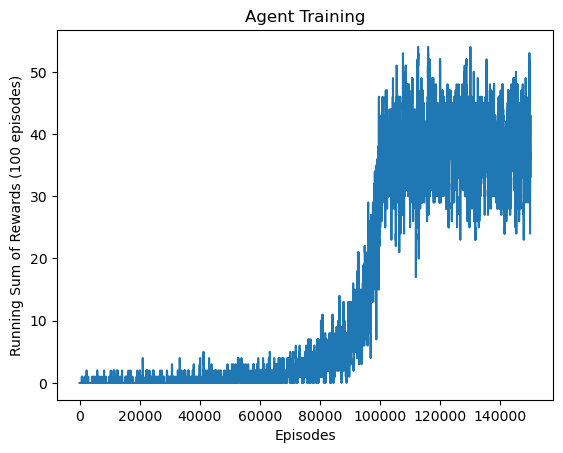

In [6]:
start_time = time.time()

rewards_per_episode = run(150000, is_training=True, render=False)

print(f'Total Runtime: {time.time() - start_time}')

episode 200
episode 400
episode 600
episode 800
episode 1000


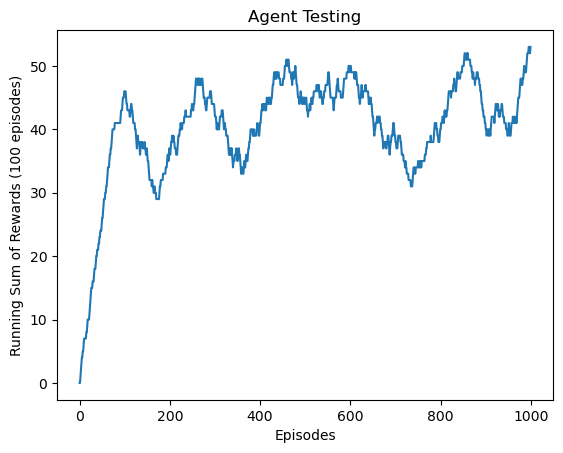

In [7]:
rewards_per_episode = run(1000, is_training=False, render=False)